# Deep Learning for Image Classification

In this notebook I will be showing you a simple model that can be used for classification and also show the importance of model architecture by comparing it with a CNN based algorithm on Cifar-10 Dataset

# 1 Import Libraries

In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# 2 Load Dataset

In [2]:
cifar10 = tf.keras.datasets.cifar10
 
# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

170498071/170498071 [==============================] - 12s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


# 3 Preprocessing

In [3]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
 
# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

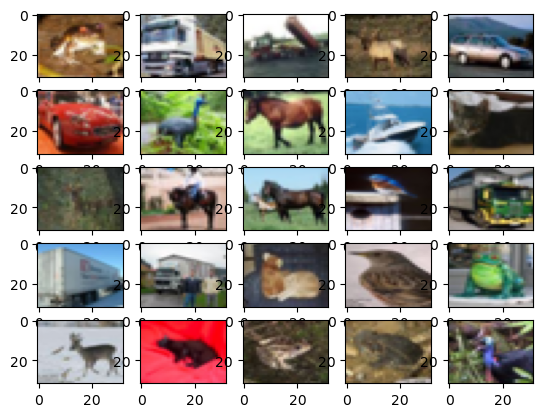

In [4]:
fig, ax = plt.subplots(5, 5)
k = 0
 
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1
 
plt.show()

In [5]:
# 4 Basic Model 
# 4.1 Defining the model

In [6]:
 # Define the sequential model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),  # Flattening the input
    tf.keras.layers.Dense(256, activation='relu'),  # Hidden layer with 256 units and ReLU activation
    tf.keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 units and ReLU activation
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer with 64 units and ReLU activation
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer with 10 units for class probabilities
])



# 4.2 Compile the model

In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 828,490
Trainable params: 828,490
Non-trainable params: 0
_________________________________________________________________


# 4.3 Training the model

In [8]:
%%time
# Fit the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25)

Epoch 1/25
1563/1563 [==============================] - 11s 4ms/step - loss: 1.8655 - accuracy: 0.3197 - val_loss: 1.7089 - val_accuracy: 0.3849
Epoch 2/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6919 - accuracy: 0.3908 - val_loss: 1.6467 - val_accuracy: 0.4114
Epoch 3/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6133 - accuracy: 0.4214 - val_loss: 1.5833 - val_accuracy: 0.4275
Epoch 4/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5619 - accuracy: 0.4416 - val_loss: 1.5347 - val_accuracy: 0.4489
Epoch 5/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5240 - accuracy: 0.4553 - val_loss: 1.5484 - val_accuracy: 0.4434
Epoch 6/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4960 - accuracy: 0.4647 - val_loss: 1.5525 - val_accuracy: 0.4527
Epoch 7/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4753 - accuracy: 0.4733 - val_loss: 1.4925 - val_accuracy

# 4.4 Evaluate the model

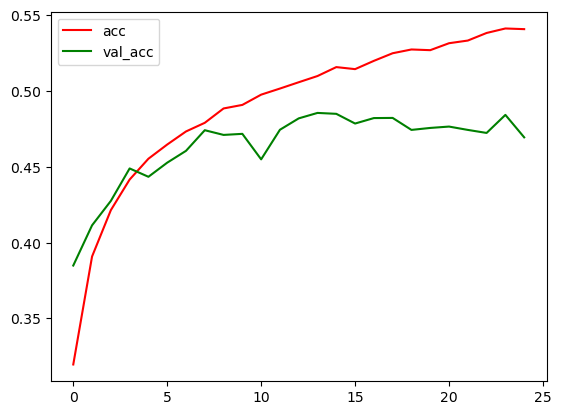

In [9]:
# Plot accuracy per iteration
plt.plot(history.history['accuracy'], label='acc', color='red')
plt.plot(history.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

In [10]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 1.5116 - accuracy: 0.4694
Test loss: 1.5116145610809326
Test accuracy: 0.46939998865127563


# 5 CNN Based Architecture
# 5.1 Defining the Model

In [11]:

# Define the number of classes
K = len(set(y_train))
print("Number of classes:", K)

# Build the model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))

# Hidden layers
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(K, activation='softmax'))

# Model summary
model.summary()


Number of classes: 10
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                

# 5.2 Compile the model

In [12]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5.3 Define Callbacks

In [13]:

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001)


# 5.4 Train the model

In [14]:

%%time
# Fit
r = model.fit(
  x_train, y_train, validation_data=(x_test, y_test), epochs=50,
  callbacks=[early_stopping, reduce_lr])

Epoch 1/50
1563/1563 [==============================] - 21s 8ms/step - loss: 1.2785 - accuracy: 0.5611 - val_loss: 0.9407 - val_accuracy: 0.6711 - lr: 0.0010
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8241 - accuracy: 0.7149 - val_loss: 0.9145 - val_accuracy: 0.6965 - lr: 0.0010
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6791 - accuracy: 0.7662 - val_loss: 0.7755 - val_accuracy: 0.7303 - lr: 0.0010
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5736 - accuracy: 0.8033 - val_loss: 1.1447 - val_accuracy: 0.6534 - lr: 0.0010
Epoch 5/50
1563/1563 [==============================] - 12s 7ms/step - loss: 0.4887 - accuracy: 0.8327 - val_loss: 0.6090 - val_accuracy: 0.8007 - lr: 0.0010
Epoch 6/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4124 - accuracy: 0.8576 - val_loss: 0.6100 - val_accuracy: 0.8043 - lr: 0.0010
Epoch 7/50
1563/1563 [==============================

# 5.5 Evaluating the model

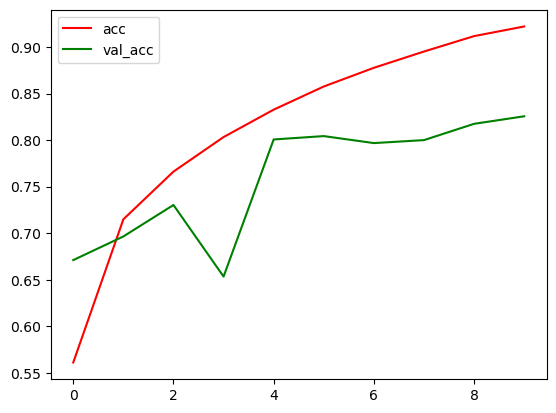

In [15]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

In [16]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')


313/313 [==============================] - 1s 3ms/step - loss: 0.6090 - accuracy: 0.8007
Test loss: 0.6089791059494019
Test accuracy: 0.8007000088691711


# 5.6 Checking the final model with the some examples

1/1 [==============================] - 0s 267ms/step
Original label is frog and predicted label is frog


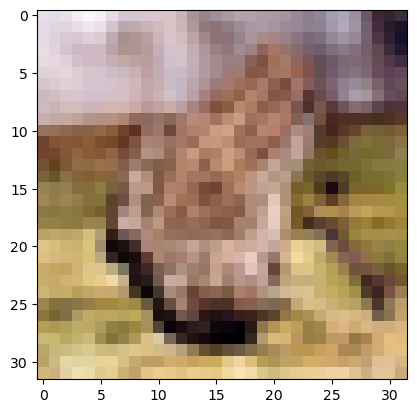

In [17]:
# label mapping
 
labels = '''airplane automobile bird cat deer dog frog horseship truck'''.split()
 
# select the image from our test dataset
image_number = 7389
 
# display the image
plt.imshow(x_test[image_number])
 
# load the image in an array
n = np.array(x_test[image_number])
 
# reshape it
p = n.reshape(1, 32, 32, 3)
 
# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]
 
# load the original label
original_label = labels[y_test[image_number]]
 
# display the result
print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))

# Thank You for Reading